## Problem Statement

## Import Dataset

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Libraries to import different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Libraries to tune different models
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Libraries to perform statistical analysis
import scipy.stats as stats


# Libraries to tune different models
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Libraries to perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

#Library for date functions
import datetime

In [ ]:
#Libraries for oversampling and undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#Libraries for creating scorer
from sklearn import metrics
from sklearn.metrics import make_scorer

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the data
data = pd.read_csv("/content/drive/MyDrive/visaapprovaldataset.csv")

In [ ]:
df = data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
df.shape

(25480, 12)

#### Check the data types of the columns for the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
df.describe(include="all")

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV25480,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


#### Fixing the negative values in number of employees columns




In [ ]:
#check the rows with no of employees count as negative
df[df['no_of_employees'] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [ ]:

#based on the values in the other columns looks like they are valid entries and it could be a data entry error. Hence turning them into positive values
df['no_of_employees'] = df['no_of_employees'].apply(lambda x: x * -1 if x < 0 else x)

In [ ]:
df[df['no_of_employees'] < 0]['no_of_employees'].count()

np.int64(0)

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
#get the list of all categorical columns
catcols = df.select_dtypes(include='object').columns
#loop through all categorical columns to print the unique categories and thier counts
for col in catcols:
  print(df[col].value_counts())
  print("-"*100)

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
----------------------------------------------------------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
requires_

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

<ipython-input-34-b8b295b44322>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


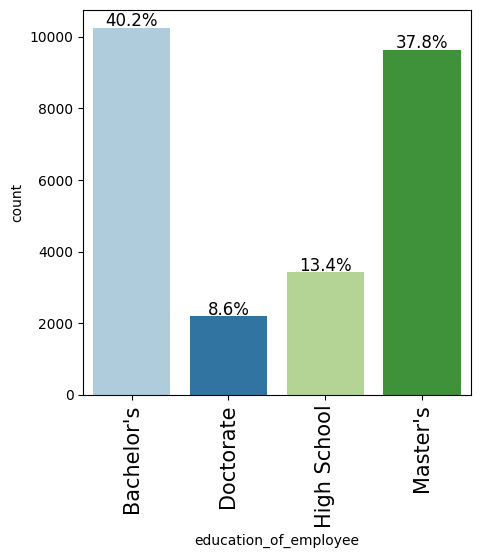

<Axes: xlabel='education_of_employee', ylabel='count'>

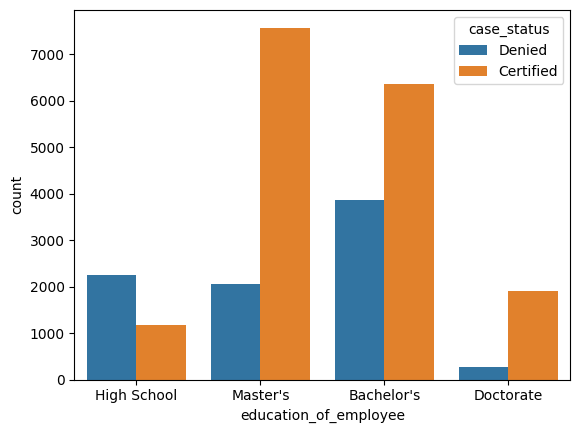

In [ ]:
labeled_barplot(df, "education_of_employee", perc=True)
sns.countplot(df, x='education_of_employee', hue='case_status')

#### Observations on region of employment

<ipython-input-34-b8b295b44322>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


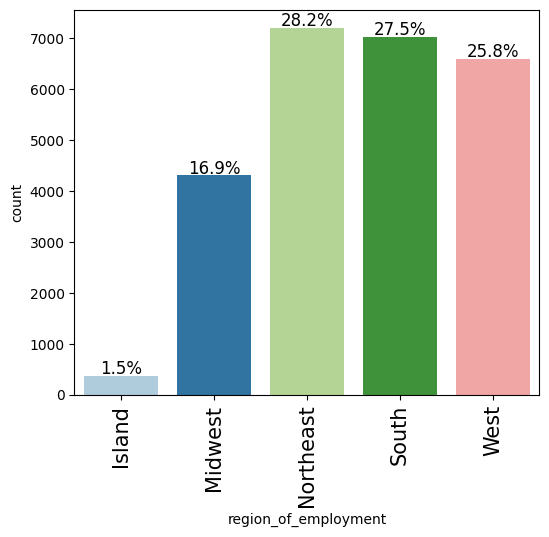

<Axes: xlabel='region_of_employment', ylabel='count'>

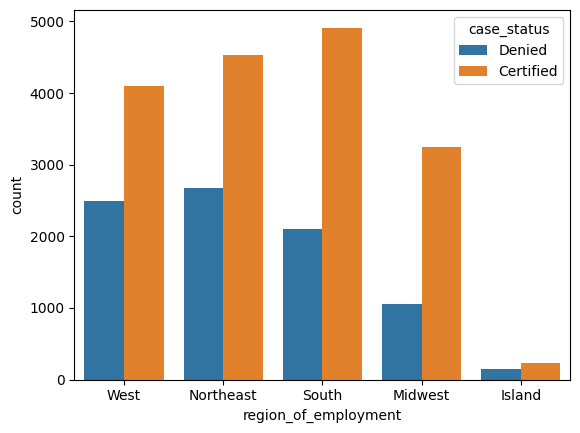

In [ ]:
labeled_barplot(df, "region_of_employment", perc=True)
sns.countplot(df, x='region_of_employment', hue='case_status')

#### Observations on job experience

<ipython-input-34-b8b295b44322>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


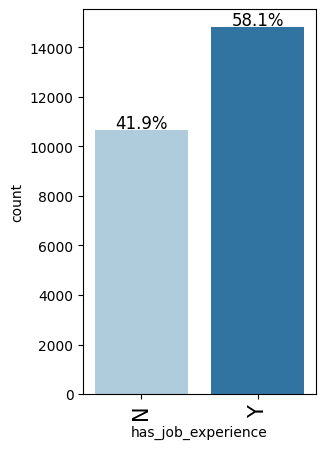

<Axes: xlabel='has_job_experience', ylabel='count'>

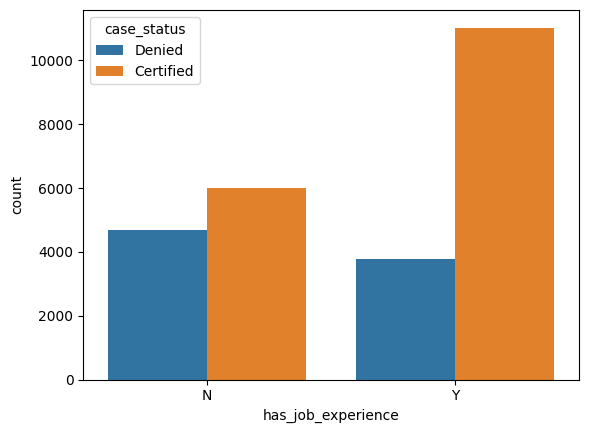

In [ ]:
labeled_barplot(df, "has_job_experience", perc=True)
sns.countplot(df, x='has_job_experience', hue='case_status')

#### Observations on case status

<ipython-input-34-b8b295b44322>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


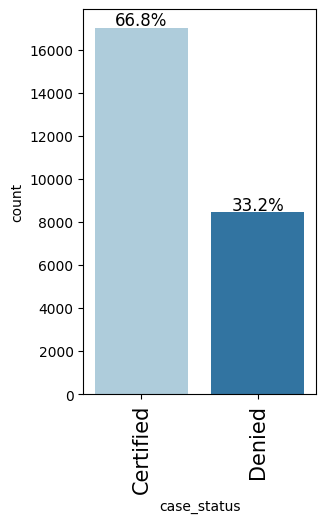

<Axes: xlabel='case_status', ylabel='count'>

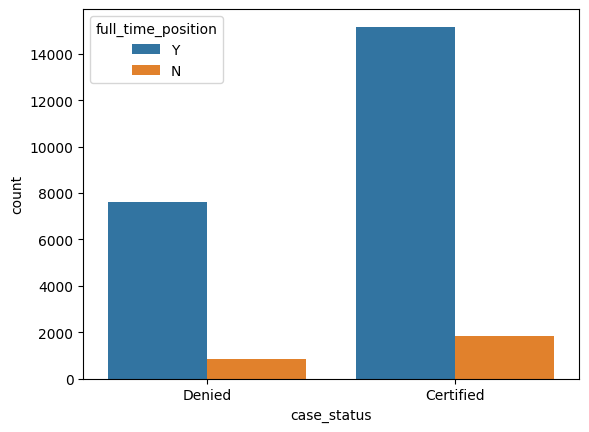

In [ ]:
labeled_barplot(df, "case_status", perc=True)
sns.countplot(df, x='case_status', hue='full_time_position')

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

<ipython-input-60-a52874dbc0ad>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-60-a52874dbc0ad>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


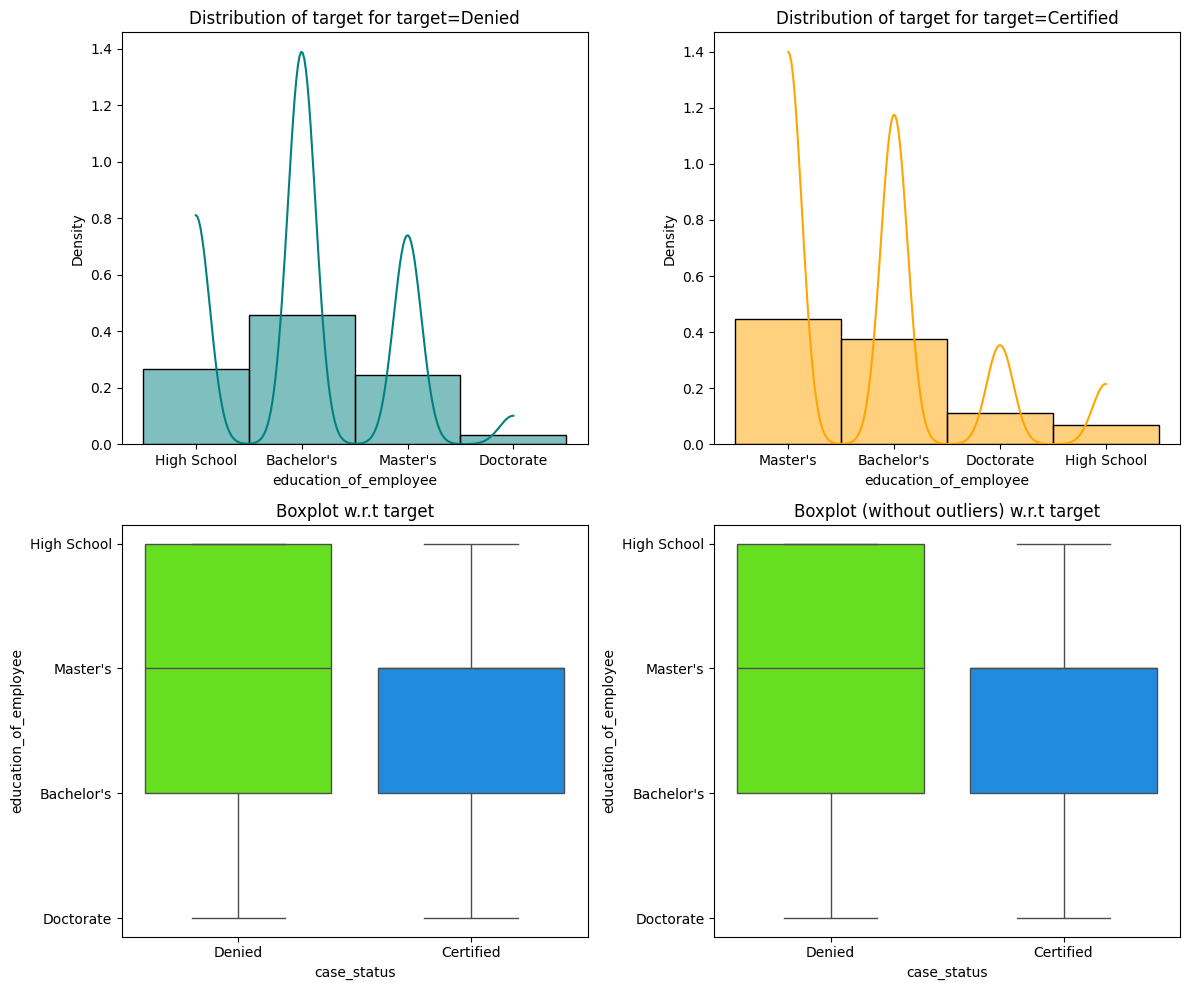

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


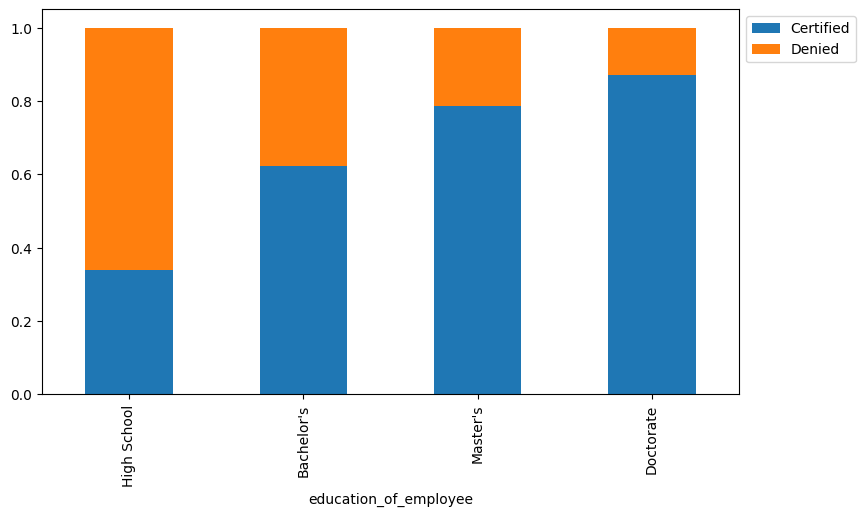

In [ ]:
distribution_plot_wrt_target(df, "education_of_employee", "case_status")
stacked_barplot(df, "education_of_employee", "case_status")

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

<ipython-input-60-a52874dbc0ad>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-60-a52874dbc0ad>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


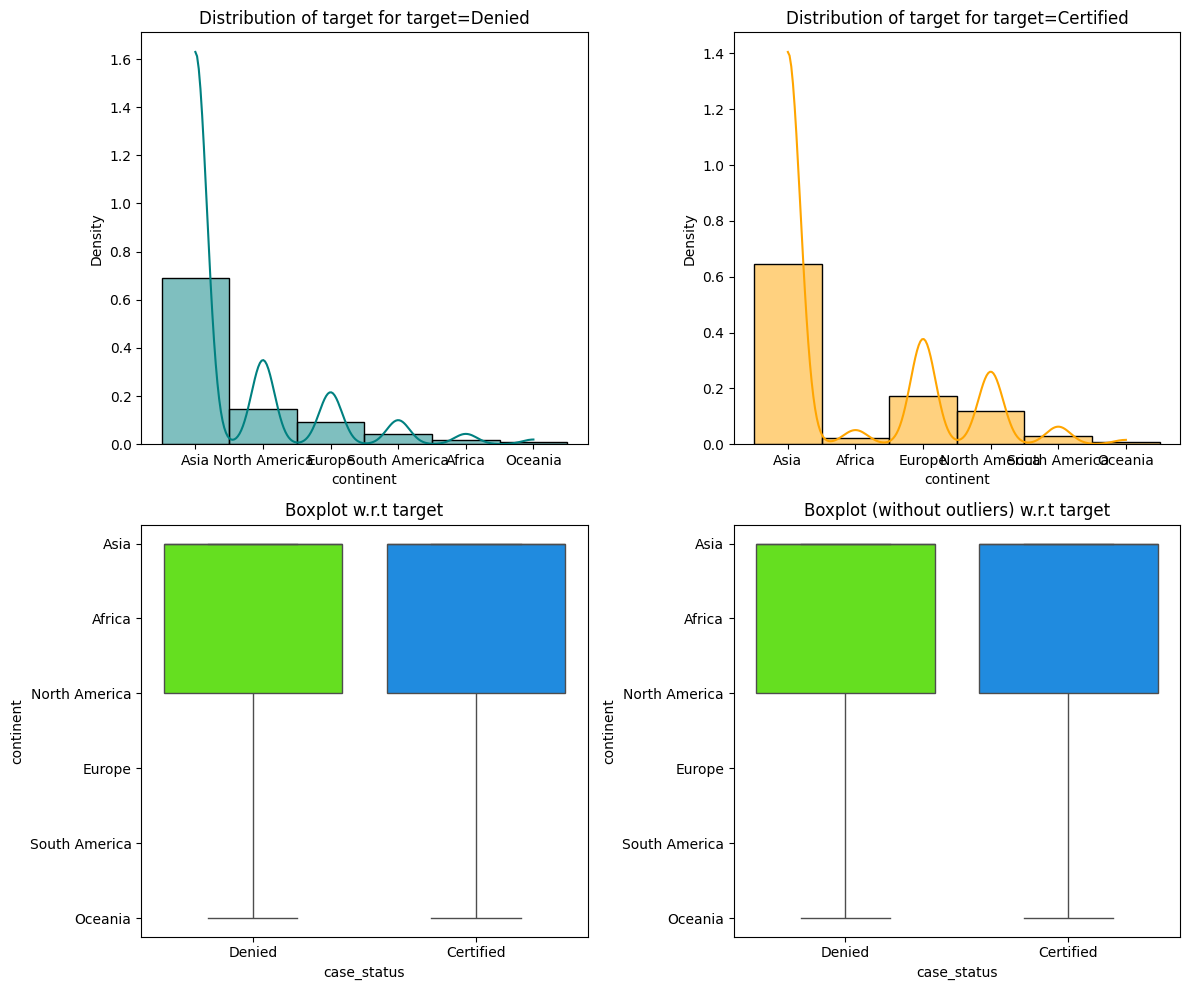

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


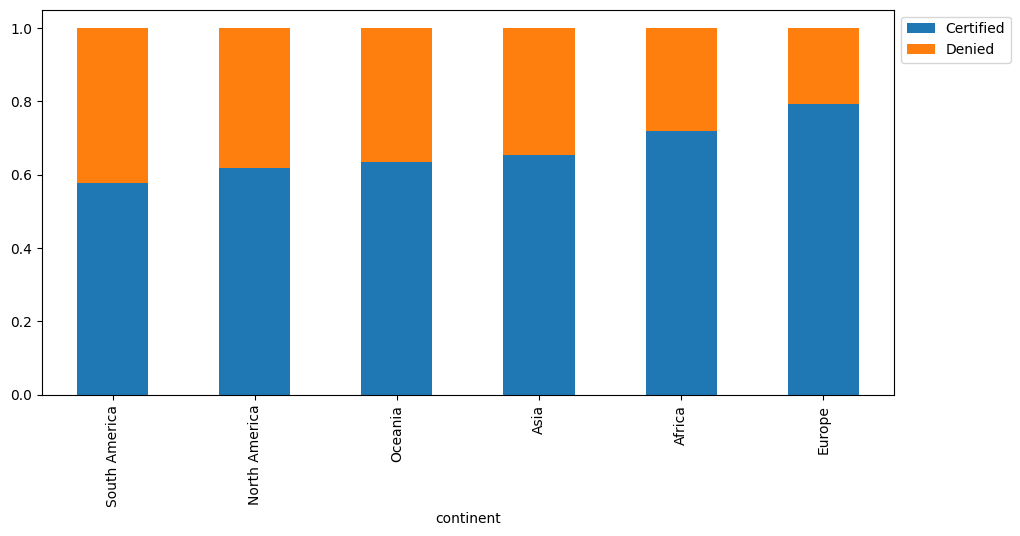

In [ ]:
distribution_plot_wrt_target(df, "continent", "case_status")
stacked_barplot(df, "continent", "case_status")

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

<ipython-input-60-a52874dbc0ad>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-60-a52874dbc0ad>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


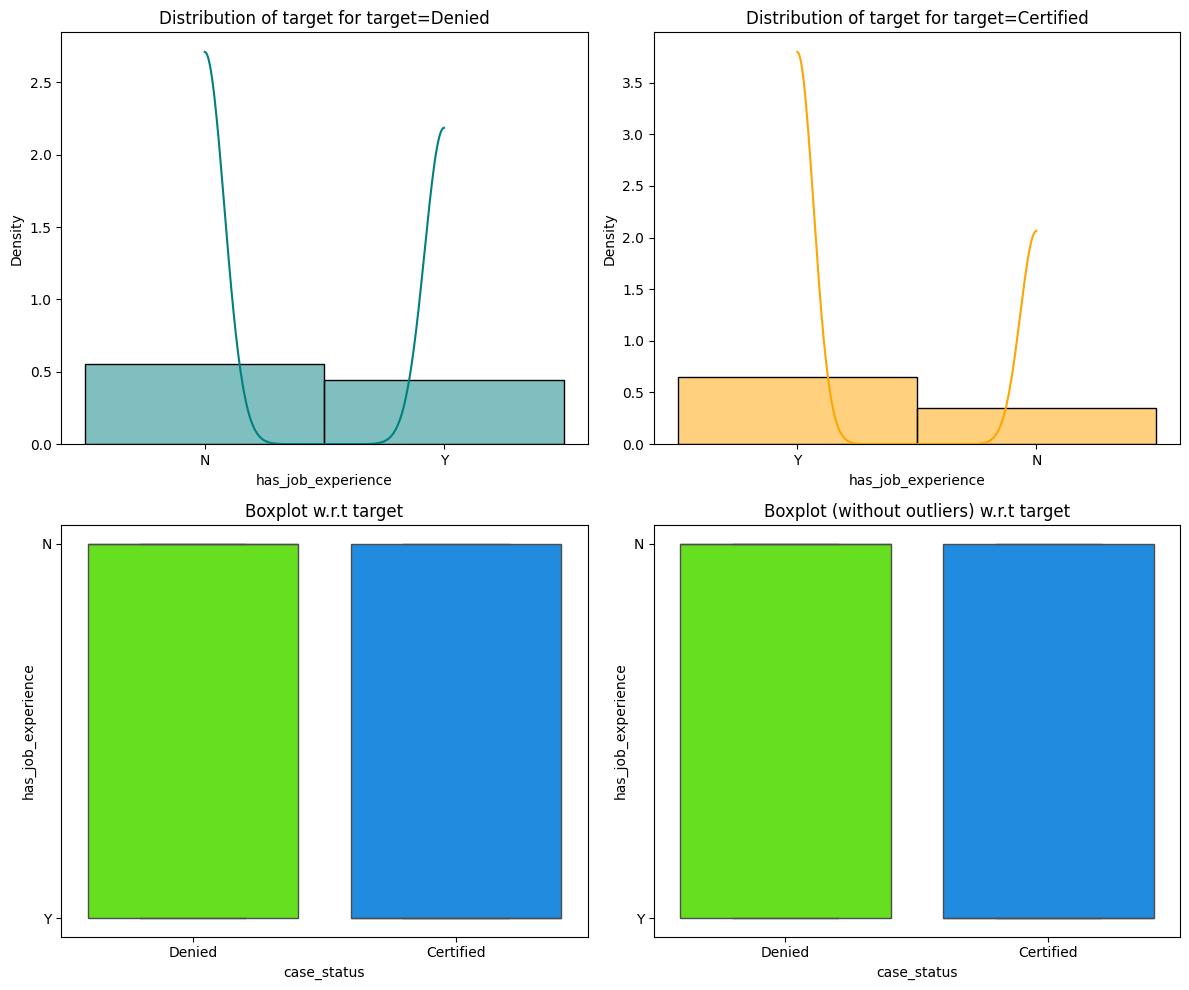

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


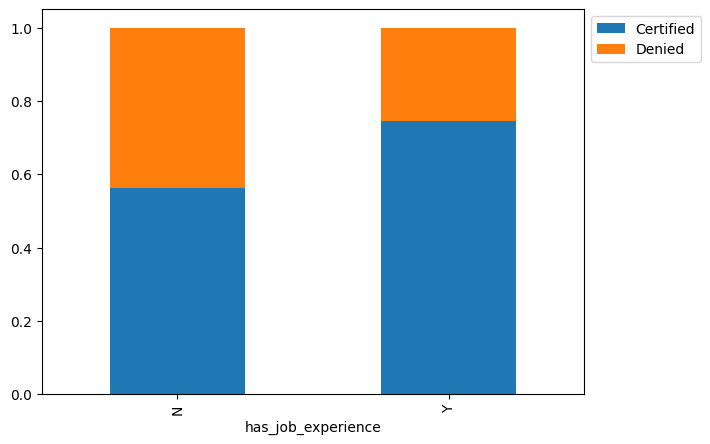

In [ ]:
distribution_plot_wrt_target(df, "has_job_experience", "case_status")
stacked_barplot(df, "has_job_experience", "case_status")

#### Checking if the prevailing wage is similar across all the regions of the US

<ipython-input-59-a52874dbc0ad>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-59-a52874dbc0ad>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


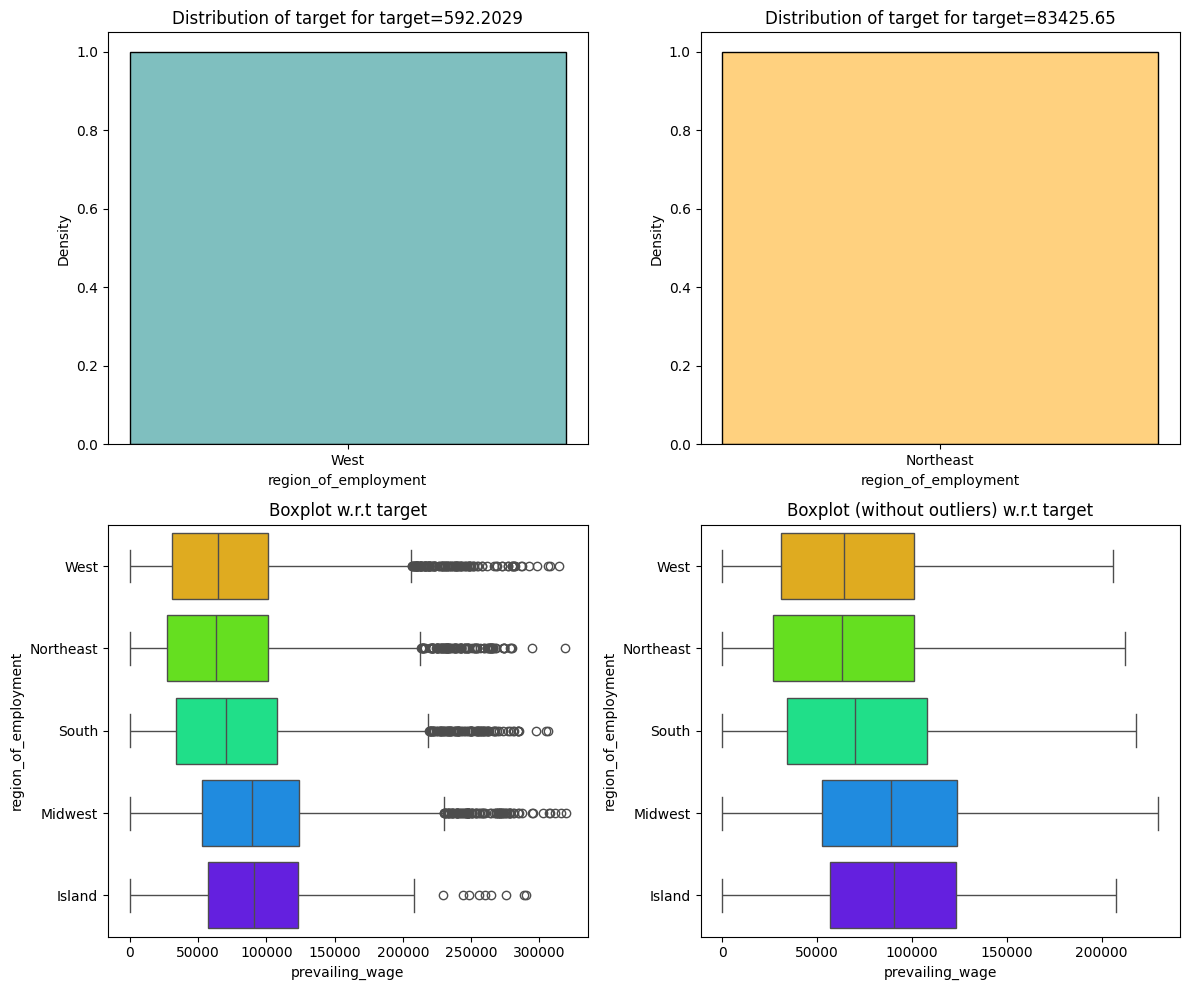

In [ ]:
distribution_plot_wrt_target(df, "region_of_employment", "prevailing_wage")

<ipython-input-60-a52874dbc0ad>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-60-a52874dbc0ad>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


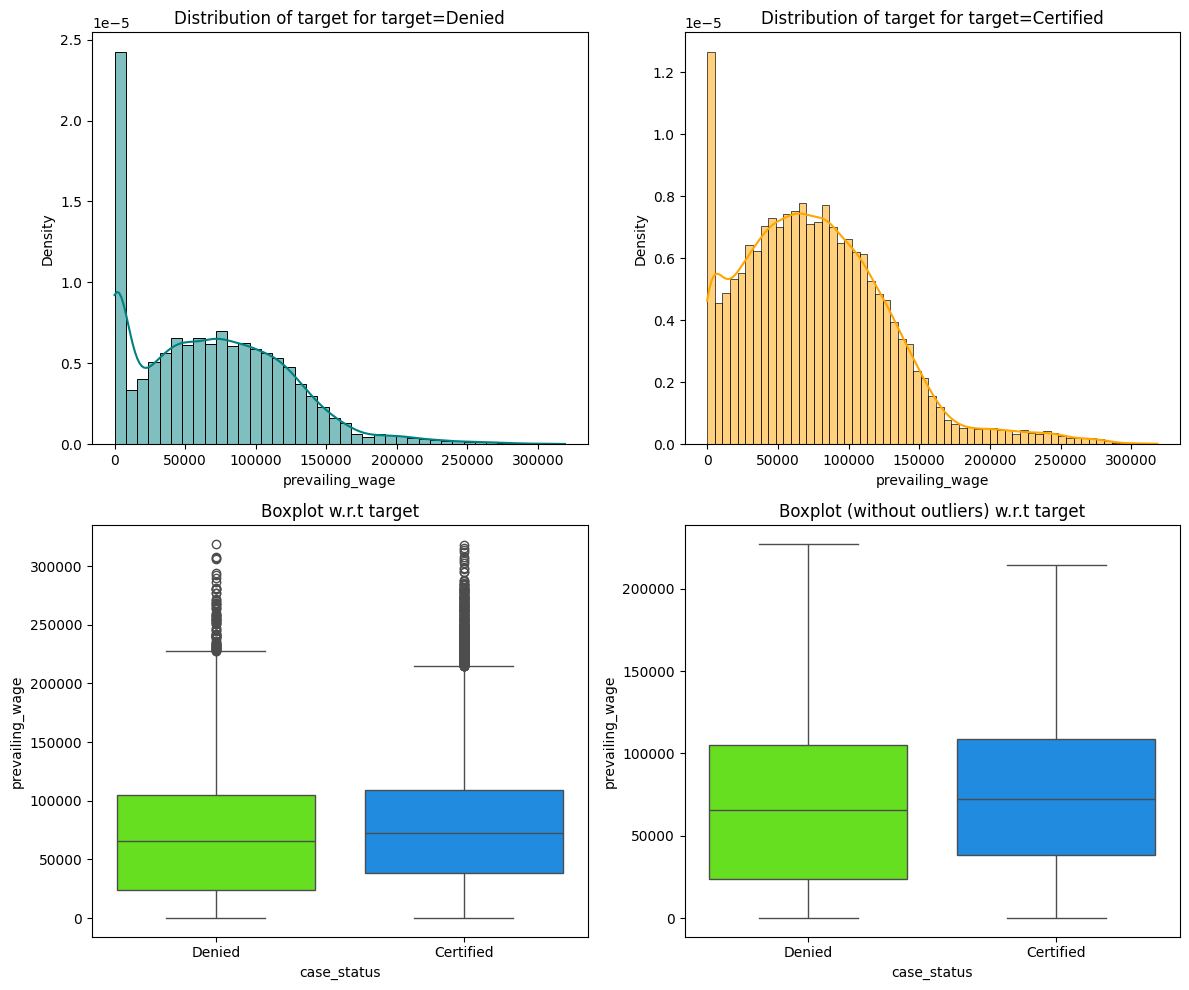

In [ ]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

<ipython-input-60-a52874dbc0ad>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-60-a52874dbc0ad>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


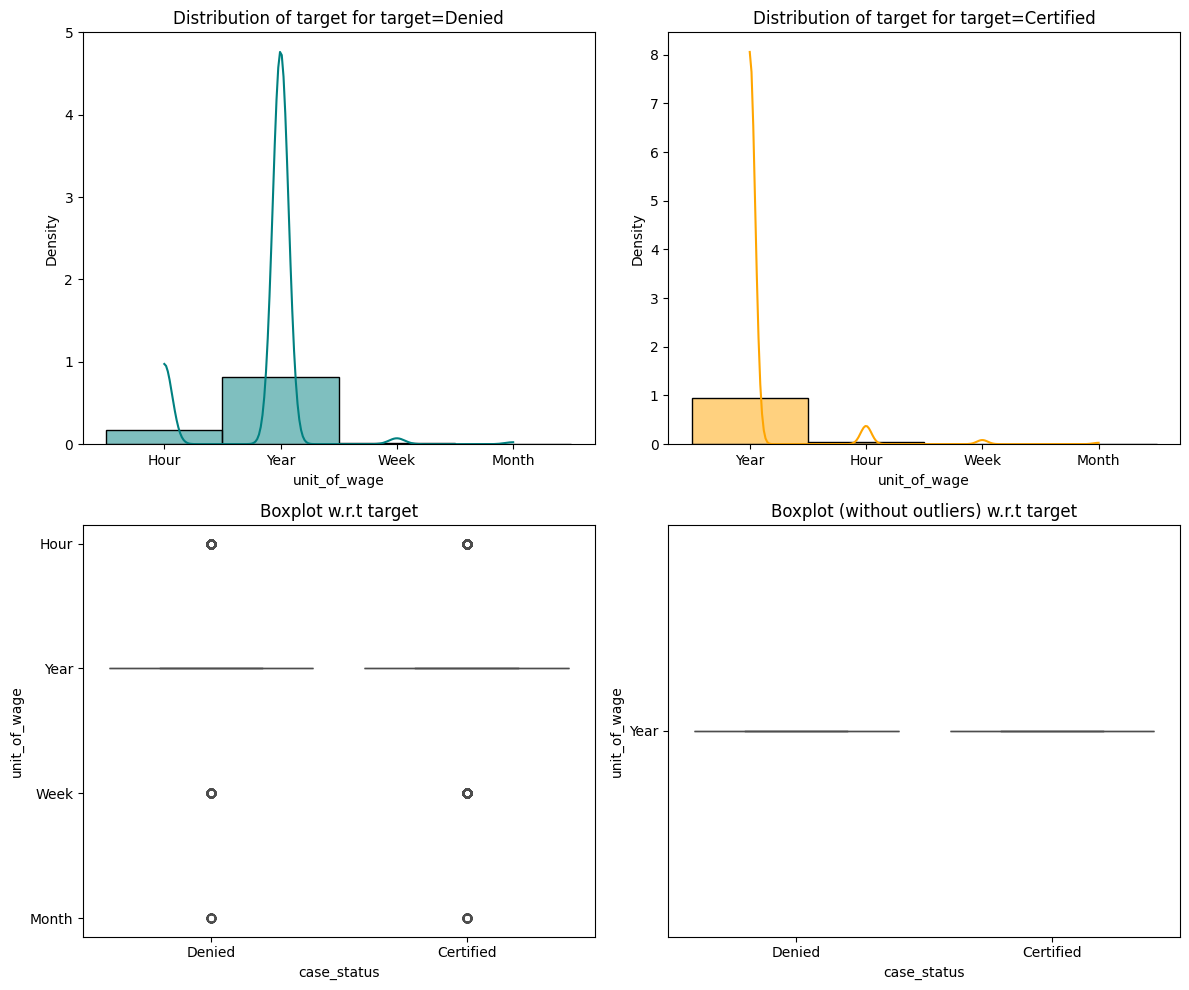

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


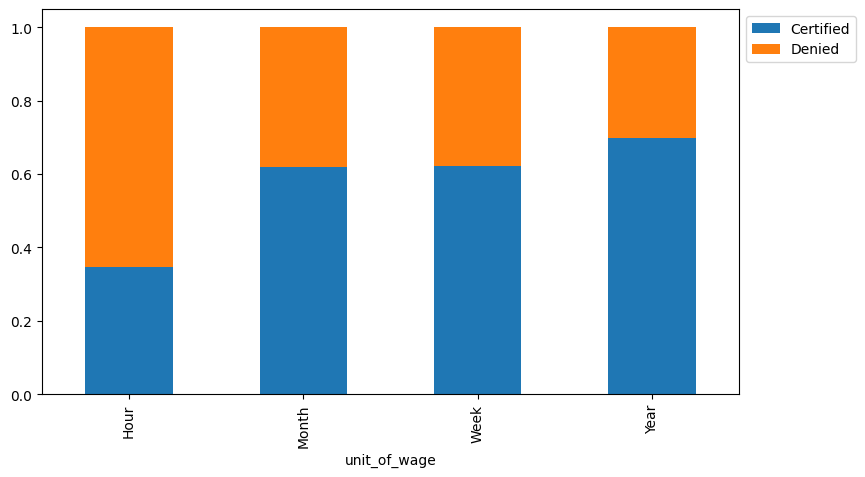

In [ ]:
distribution_plot_wrt_target(df, "unit_of_wage", "case_status")
stacked_barplot(df, "unit_of_wage", "case_status")

## Data Pre-processing

### Outlier Check

<Axes: ylabel='no_of_employees'>

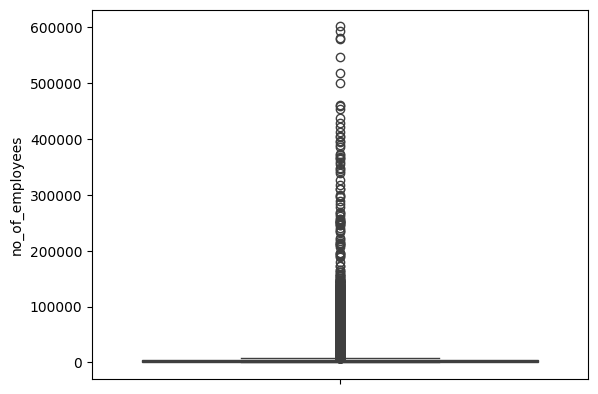

In [ ]:
sns.boxplot(df['no_of_employees'])

<Axes: ylabel='prevailing_wage'>

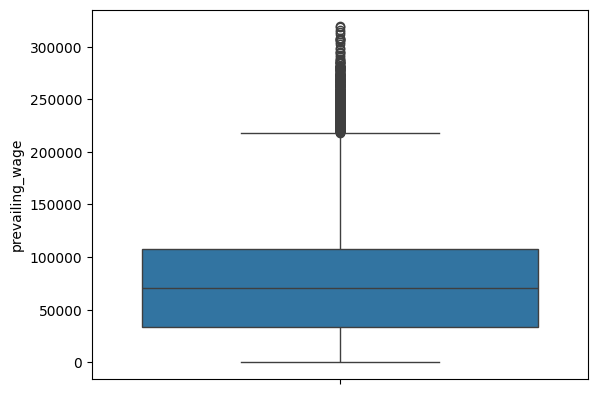

In [ ]:
sns.boxplot(df['prevailing_wage'])

<Axes: ylabel='yr_in_existence'>

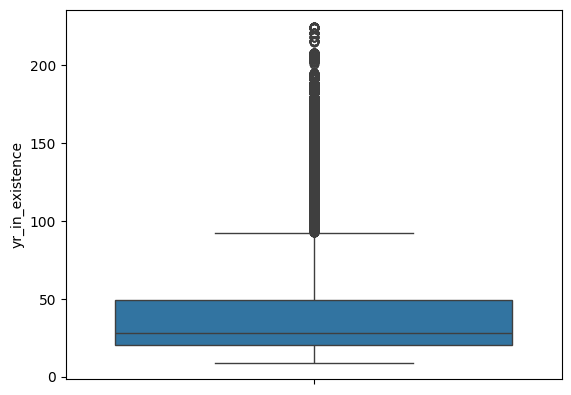

In [ ]:
sns.boxplot(df['yr_in_existence'])

### Data Preparation for modeling

In [ ]:
#drop the case id column as it was identified to not add value
df.drop('case_id', axis=1, inplace=True)

####Feature Engineering

In [ ]:
# Added a new field yr_in_existence in order to consider the yr_of_estab
df['yr_in_existence'] = df['yr_of_estab'].apply(lambda x: datetime.datetime.now().year - x)


In [ ]:
#drop the yr_of_estab column
df.drop('yr_of_estab', axis=1, inplace=True)

In [ ]:
# Encode the categorial columns which have binary values
casestatus_enc = {'Certified': 1, 'Denied': 0}
YandN_enc = {'Y': 1, 'N' : 0}

df['has_job_experience'] = df['has_job_experience'].map(YandN_enc)
df['full_time_position'] = df['full_time_position'].map(YandN_enc)
df['requires_job_training'] = df['requires_job_training'].map(YandN_enc)
df['case_status'] = df['case_status'].map(casestatus_enc)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  int64  
 3   requires_job_training  25480 non-null  int64  
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  int64  
 9   case_status            25480 non-null  int64  
 10  yr_in_existence        25480 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 2.1+ MB


In [ ]:
df_enc= pd.get_dummies(df, columns= df.select_dtypes('object').columns,drop_first=True)
df_enc

,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,case_status,yr_in_existence,continent_Asia,continent_Europe,continent_North America,...,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0,0,14513,592.2029,1,0,18,True,False,False,...,False,True,False,False,False,False,True,False,False,False
1,1,0,2412,83425.6500,1,1,23,True,False,False,...,False,False,True,False,True,False,False,False,False,True
2,0,1,44444,122996.8600,1,0,17,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0,98,83434.0300,1,0,128,True,False,False,...,False,False,False,False,False,False,True,False,False,True
4,1,0,1082,149907.3900,1,1,20,False,False,False,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,1,1,2601,77092.5700,1,1,17,True,False,False,...,False,False,False,False,False,True,False,False,False,True
25476,1,0,3274,279174.7900,1,1,19,True,False,False,...,False,True,False,False,True,False,False,False,False,True
25477,1,0,1121,146298.8500,0,1,115,True,False,False,...,False,False,True,False,False,True,False,False,False,True
25478,1,1,1918,86154.7700,1,1,138,True,False,False,...,False,False,True,False,False,False,True,False,False,True


## Model Building

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# function to plot the confusion matrix with labels
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In this current context
* False positive is when a individual is not qualified but ML model predicts the individual as qualified
* False negative is when a individual is qualified but ML model predicts the individual as not qualified
* As the objective is to identify the candidates having higher chances of visa approval/case being certified, that means identifying qualified individuals
* Hence our models focus should be to reduce the false negatives, which is indicated by higher recall score. Recall score will be our focus area.

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

Lets start with
* Basic decision tree
* Bagging Classifier
* Randaom Forest Classifier

In [ ]:
df_enc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25480 non-null  int64  
 1   requires_job_training              25480 non-null  int64  
 2   no_of_employees                    25480 non-null  int64  
 3   prevailing_wage                    25480 non-null  float64
 4   full_time_position                 25480 non-null  int64  
 5   case_status                        25480 non-null  int64  
 6   yr_in_existence                    25480 non-null  int64  
 7   continent_Asia                     25480 non-null  bool   
 8   continent_Europe                   25480 non-null  bool   
 9   continent_North America            25480 non-null  bool   
 10  continent_Oceania                  25480 non-null  bool   
 11  continent_South America            25480 non-null  boo

In [ ]:
#take the independent variables in X and dependent variable in y
X = df_enc.drop('case_status', axis=1)
y = df_enc['case_status']

#split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)




In [ ]:
#check the size of the train and test to make sure the distribution is right in both the sets
print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(20384, 21) (5096, 21)
case_status
1    0.667877
0    0.332123
Name: proportion, dtype: float64
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64


####Decision Tree

In [ ]:
#initialize the model and fit the training set
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
#check the model performance on training set
model_performance_classification_sklearn(dtree, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
#check the model performance on test set
dtree_performance_original_test = model_performance_classification_sklearn(dtree, X_test, y_test)
dtree_performance_original_test

,Accuracy,Recall,Precision,F1
0,0.654042,0.742068,0.740545,0.741306


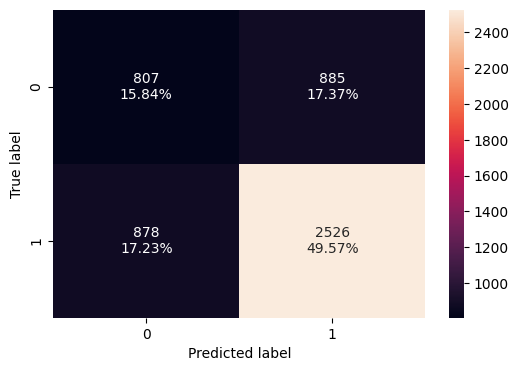

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

#### Random Forest

In [ ]:
#initialize the model and fit the training set
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
model_performance_classification_sklearn(rfc, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
rfc_performance_orginal_test = model_performance_classification_sklearn(rfc, X_test, y_test)
rfc_performance_orginal_test

,Accuracy,Recall,Precision,F1
0,0.718014,0.832844,0.765595,0.797805


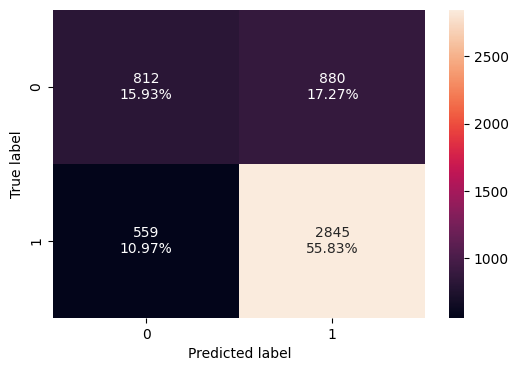

In [ ]:
#plot the confusion matrix with labels
confusion_matrix_sklearn(rfc, X_test, y_test)

#### Bagging Classifier

In [ ]:
#initialize the model
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=1)
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [ ]:
model_performance_classification_sklearn(bagging, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
bagging_performance_orginal_test = model_performance_classification_sklearn(bagging, X_test, y_test)
bagging_performance_orginal_test

,Accuracy,Recall,Precision,F1
0,0.711735,0.827556,0.761557,0.793186


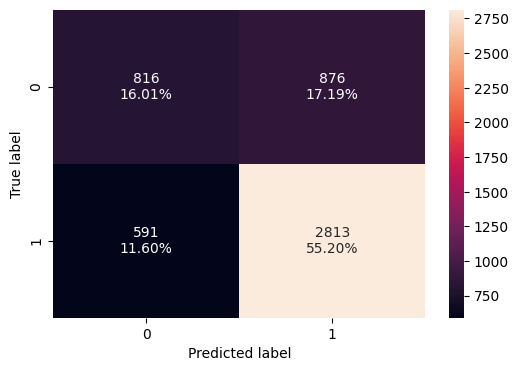

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
#initialize a bagging classifier with class weight based on the percentage of the values in case status
bagging_wt = BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.66,1:0.34}, random_state=1), n_estimators=100, random_state=1)
bagging_wt.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight={0: 0.66,
                                                                 1: 0.34},
                                                   random_state=1),
                  n_estimators=100, random_state=1)

In [ ]:
#traing performance
model_performance_classification_sklearn(bagging_wt, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.999951,1.0,0.999927,0.999963


In [ ]:
#testing performance
bagging_wt_performance_orginal_test = model_performance_classification_sklearn(bagging_wt, X_test, y_test)
bagging_wt_performance_orginal_test

,Accuracy,Recall,Precision,F1
0,0.713305,0.836957,0.758722,0.795921


#### AdaBoost

In [ ]:
#initialize the model
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
#traing performance
model_performance_classification_sklearn(adaboost, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.74063,0.88622,0.763463,0.820274


In [ ]:
#testing performance
ada_performance_original_test = model_performance_classification_sklearn(adaboost, X_test, y_test)
ada_performance_original_test

,Accuracy,Recall,Precision,F1
0,0.73175,0.882197,0.756614,0.814594


#### Gradient Boosting

In [ ]:
#initialize the model
gbmboost = GradientBoostingClassifier(random_state=1)
gbmboost.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
#training performance
model_performance_classification_sklearn(gbmboost, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.758732,0.8824,0.783627,0.830086


In [ ]:
#testing performance
gbm_performance_original_test = model_performance_classification_sklearn(gbmboost, X_test, y_test)
gbm_performance_original_test

,Accuracy,Recall,Precision,F1
0,0.742936,0.874559,0.771244,0.819659


In [ ]:
models_performance_original_test_df = pd.concat([dtree_performance_original_test.T, rfc_performance_orginal_test.T, bagging_performance_orginal_test.T, bagging_wt_performance_orginal_test.T, ada_performance_original_test.T, gbm_performance_original_test.T], axis=1)
models_performance_original_test_df.columns = ['DT','RFC','Bagging','Bagging_wt', 'Ada', 'GBM']
models_performance_original_test_df

,DT,RFC,Bagging,Bagging_wt,Ada,GBM
Accuracy,0.654042,0.718014,0.711735,0.713305,0.731750,0.742936
Recall,0.742068,0.832844,0.827556,0.836957,0.882197,0.874559
Precision,0.740545,0.765595,0.761557,0.758722,0.756614,0.771244
F1,0.741306,0.797805,0.793186,0.795921,0.814594,0.819659


#### Overall Observations on Original data

* Compairing the results, Ada Boost model without any tuning has the best recall score of 88%

### Model Building with oversampled data

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print('Before oversampling:', y_train.value_counts())
print('After oversampling:', y_train_over.value_counts())

Before oversampling: case_status
1    13614
0     6770
Name: count, dtype: int64
After oversampling: case_status
0    13614
1    13614
Name: count, dtype: int64


In [ ]:
#initialize a empty list and add all the models you want to test
models = []
models.append(('DT', DecisionTreeClassifier(random_state=1)))
models.append(('RFC', RandomForestClassifier(random_state=1)))
models.append(('Bagging', BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=1)))
models.append(('Bagging_wt', BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.5,1:0.5}, random_state=1), n_estimators=100, random_state=1)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=1)))
models.append(('GBM', GradientBoostingClassifier(random_state=1)))

#loop through the each model and print the performance
models_performance_over_test = []
for name, model in models:
    model.fit(X_train_over, y_train_over)
    print(model)
    print("Training performance:\n", model_performance_classification_sklearn(model, X_train_over, y_train_over))
    print("Testing performance:\n", model_performance_classification_sklearn(model, X_test, y_test))
    print("-"*100)
    models_performance_over_test.append(model_performance_classification_sklearn(model, X_test, y_test))

DecisionTreeClassifier(random_state=1)
Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.661695  0.739718   0.750298  0.74497
----------------------------------------------------------------------------------------------------
RandomForestClassifier(random_state=1)
Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.712323  0.817568   0.767089  0.791524
----------------------------------------------------------------------------------------------------
BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)
Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.704474  0.806992   0.763904  0.784857
-------

In [ ]:

models_performance_over_test_df = pd.concat(models_performance_over_test, axis=0).T
models_performance_over_test_df.columns = ['DT','RFC','Bagging','Bagging_wt', 'Ada', 'GBM']
models_performance_over_test_df

,DT,RFC,Bagging,Bagging_wt,Ada,GBM
Accuracy,0.661695,0.712323,0.704474,0.704474,0.721546,0.736852
Recall,0.739718,0.817568,0.806992,0.806992,0.834900,0.838425
Precision,0.750298,0.767089,0.763904,0.763904,0.768316,0.782990
F1,0.744970,0.791524,0.784857,0.784857,0.800225,0.809760


### Model Building with undersampled data

In [ ]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print('Before undersampling:', y_train.value_counts())
print('After undersampling:', y_train_un.value_counts())


Before undersampling: case_status
1    13614
0     6770
Name: count, dtype: int64
After undersampling: case_status
0    6770
1    6770
Name: count, dtype: int64


In [ ]:
#initialize a empty list and add all the models you want to test
models = []
models.append(('DT', DecisionTreeClassifier(random_state=1)))
models.append(('RFC', RandomForestClassifier(random_state=1)))
models.append(('Bagging', BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=1)))
models.append(('Bagging_wt', BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.5,1:0.5}, random_state=1), n_estimators=100, random_state=1)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=1)))
models.append(('GBM', GradientBoostingClassifier(random_state=1)))

#loop through the each model and print the performance
models_performance_un_test = []
for name, model in models:
    model.fit(X_train_over, y_train_over)
    print(model)
    print("Training performance:\n", model_performance_classification_sklearn(model, X_train_un, y_train_un))
    print("Testing performance:\n", model_performance_classification_sklearn(model, X_test, y_test))
    print("-"*100)
    models_performance_un_test.append(model_performance_classification_sklearn(model, X_test, y_test))

DecisionTreeClassifier(random_state=1)
Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.661695  0.739718   0.750298  0.74497
----------------------------------------------------------------------------------------------------
RandomForestClassifier(random_state=1)
Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.712323  0.817568   0.767089  0.791524
----------------------------------------------------------------------------------------------------
BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)
Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.704474  0.806992   0.763904  0.784857
-------

In [ ]:
models_performance_un_test_df = pd.concat(models_performance_un_test, axis=0).T
models_performance_un_test_df.columns = ['DT','RFC','Bagging','Bagging_wt', 'Ada', 'GBM']
models_performance_un_test_df

,DT,RFC,Bagging,Bagging_wt,Ada,GBM
Accuracy,0.661695,0.712323,0.704474,0.704474,0.721546,0.736852
Recall,0.739718,0.817568,0.806992,0.806992,0.834900,0.838425
Precision,0.750298,0.767089,0.763904,0.763904,0.768316,0.782990
F1,0.744970,0.791524,0.784857,0.784857,0.800225,0.809760


##### Observations
* Performance of undersampled data is lower for all models compared to original data
* Performance of the undersampled data is very similar to oversampled data
* Ada Boost & GBM being the model with best recall score of around 83% for both train and test data sets

## Hyperparameter Tuning

### Tuning AdaBoost using original data

In [ ]:
# Choose the type of classifier.
ada_tuned_or = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10),
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(ada_tuned_or, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ada_tuned_best_or = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_tuned_best_or.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=np.int64(20), random_state=1)

In [ ]:
#print performance on train and test data
print('Training Peformance:\n', model_performance_classification_sklearn(ada_tuned_best_or, X_train, y_train))
print('Testing Performance:\n', model_performance_classification_sklearn(ada_tuned_best_or, X_test, y_test))
ada_tuned_performance_original_test = model_performance_classification_sklearn(ada_tuned_best_or, X_test, y_test)

Training Peformance:
    Accuracy   Recall  Precision        F1
0  0.692357  0.97172   0.692074  0.808396
Testing Performance:
    Accuracy   Recall  Precision        F1
0  0.687206  0.96651   0.689727  0.804991


### Tuning AdaBoost using oversampled data

In [ ]:
# Choose the type of classifier.
ada_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10),
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(ada_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
ada_tuned_best = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_tuned_best.fit(X_train_over, y_train_over)


AdaBoostClassifier(learning_rate=0.01, n_estimators=np.int64(70),
                   random_state=1)

In [ ]:
#print performance on train and test data
print('Training Peformance:\n', model_performance_classification_sklearn(ada_tuned_best, X_train_over, y_train_over))
print('Testing Performance:\n', model_performance_classification_sklearn(ada_tuned_best, X_test, y_test))
ada_tuned_performance_over_test = model_performance_classification_sklearn(ada_tuned_best, X_test, y_test)

Training Peformance:
    Accuracy    Recall  Precision        F1
0  0.649001  0.931982    0.59515  0.726419
Testing Performance:
    Accuracy    Recall  Precision        F1
0  0.708203  0.930082   0.717101  0.809822


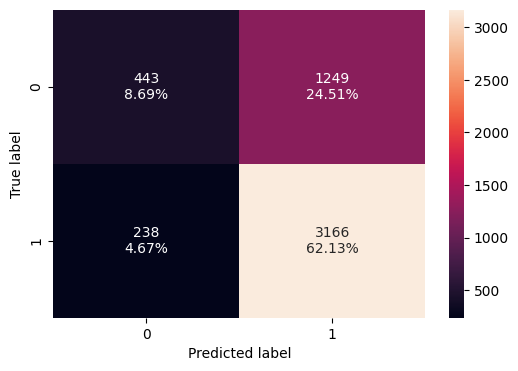

In [ ]:
confusion_matrix_sklearn(ada_tuned_best, X_test, y_test)

### Tuning Random forest using undersampled data

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
        "n_estimators": [110,150,200],
        "min_samples_leaf": np.arange(1,6,1),
        "max_features": [0.7,0.9],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = RandomizedSearchCV(rf_tuned, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
rf_tuned_best = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned_best.fit(X_train_un, y_train_un)



RandomForestClassifier(max_features=0.7, max_samples=0.7,
                       min_samples_leaf=np.int64(5), n_estimators=150,
                       random_state=1)

In [ ]:
#print the performance on train and test data
print('Training Peformance:\n', model_performance_classification_sklearn(rf_tuned_best, X_train_un, y_train_un))
print('Testing Performance:\n', model_performance_classification_sklearn(rf_tuned_best, X_test, y_test))
rfc_tuned_performance_un_test = model_performance_classification_sklearn(rf_tuned_best, X_test, y_test)

Training Peformance:
    Accuracy    Recall  Precision        F1
0  0.846677  0.837371   0.853251  0.845236
Testing Performance:
    Accuracy    Recall  Precision        F1
0  0.695447  0.705934   0.813473  0.755898


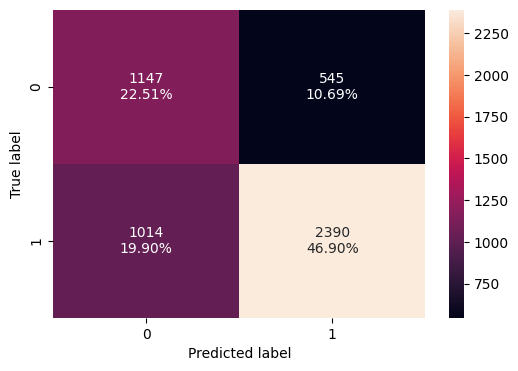

In [ ]:
confusion_matrix_sklearn(rf_tuned_best, X_test, y_test)

### Tuning with Gradient boosting with oversampled data

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

In [ ]:
# Run the grid search
grid_obj = RandomizedSearchCV(gbc_tuned,
                              scoring=scorer,
                              param_distributions=parameters,
                              cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)


In [ ]:
#select the best estimator
gbc_tuned_best = grid_obj.best_estimator_

#fit the model & check performance
gbc_tuned_best.fit(X_train_over, y_train_over)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=1)

In [ ]:
gbc_tuned_best.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init__algorithm': 'deprecated',
 'init__estimator': None,
 'init__learning_rate': 1.0,
 'init__n_estimators': 50,
 'init__random_state': 1,
 'init': AdaBoostClassifier(random_state=1),
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': 0.7,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
print('Training Peformance:\n', model_performance_classification_sklearn(gbc_tuned_best, X_train_over, y_train_over))
print('Testing Performance:\n', model_performance_classification_sklearn(gbc_tuned_best, X_test, y_test))
gbc_tuned_performance_over_test = model_performance_classification_sklearn(gbc_tuned_best, X_test, y_test)

Training Peformance:
    Accuracy    Recall  Precision      F1
0  0.808175  0.849567   0.784614  0.8158
Testing Performance:
    Accuracy   Recall  Precision        F1
0  0.737441  0.84342   0.781012  0.811017


## Model performance comparison and choosing the final model

In [ ]:
#Performance of models on original data
print("Performance of models on original data:")
models_performance_original_test_df = pd.concat([dtree_performance_original_test.T, rfc_performance_orginal_test.T, bagging_performance_orginal_test.T, bagging_wt_performance_orginal_test.T, ada_performance_original_test.T, gbm_performance_original_test.T, ada_tuned_performance_original_test.T], axis=1)
models_performance_original_test_df.columns = ['DT','RFC','Bagging','Bagging_wt', 'Ada', 'GBM', 'Ada Tuned']
print(models_performance_original_test_df)
print('-'*100)

#Performance of models on oversampled data
models_performance_over_test.append(ada_tuned_performance_over_test)
models_performance_over_test.append(gbc_tuned_performance_over_test)
models_performance_over_test_df = pd.concat(models_performance_over_test, axis=0).T
models_performance_over_test_df.columns=['DT','RFC','Bagging','Bagging_wt', 'Ada', 'GBM', 'Ada Tuned', 'GBM Tuned']
print("Performance of models on oversampled data:")
print(models_performance_over_test_df)
print('-'*100)

#Performance of models on undersampled data
models_performance_un_test.append(rfc_tuned_performance_un_test)
models_performance_un_test_df = pd.concat(models_performance_un_test, axis=0).T
models_performance_un_test_df.columns = ['DT','RFC','Bagging','Bagging_wt', 'Ada', 'GBM', 'RFC Tuned']
print("Performance of models on undersampled data:")
print(models_performance_un_test_df)
print('-'*100)






Performance of models on original data:
                 DT       RFC   Bagging  Bagging_wt       Ada       GBM  \
Accuracy   0.654042  0.718014  0.711735    0.713305  0.731750  0.742936   
Recall     0.742068  0.832844  0.827556    0.836957  0.882197  0.874559   
Precision  0.740545  0.765595  0.761557    0.758722  0.756614  0.771244   
F1         0.741306  0.797805  0.793186    0.795921  0.814594  0.819659   

           Ada Tuned  
Accuracy    0.687206  
Recall      0.966510  
Precision   0.689727  
F1          0.804991  
----------------------------------------------------------------------------------------------------
Performance of models on oversampled data:
                 DT       RFC   Bagging  Bagging_wt       Ada       GBM  \
Accuracy   0.661695  0.712323  0.704474    0.704474  0.721546  0.736852   
Recall     0.739718  0.817568  0.806992    0.806992  0.834900  0.838425   
Precision  0.750298  0.767089  0.763904    0.763904  0.768316  0.782990   
F1         0.744970  0.79

#### Features importance analysis

In [ ]:
#function to plot the features importance for a model
def plot_feature_importance_for_model(model):
  feature_names = X_test.columns
  importances = model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(12,12))
  plt.title('Feature Importances')
  plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
  plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

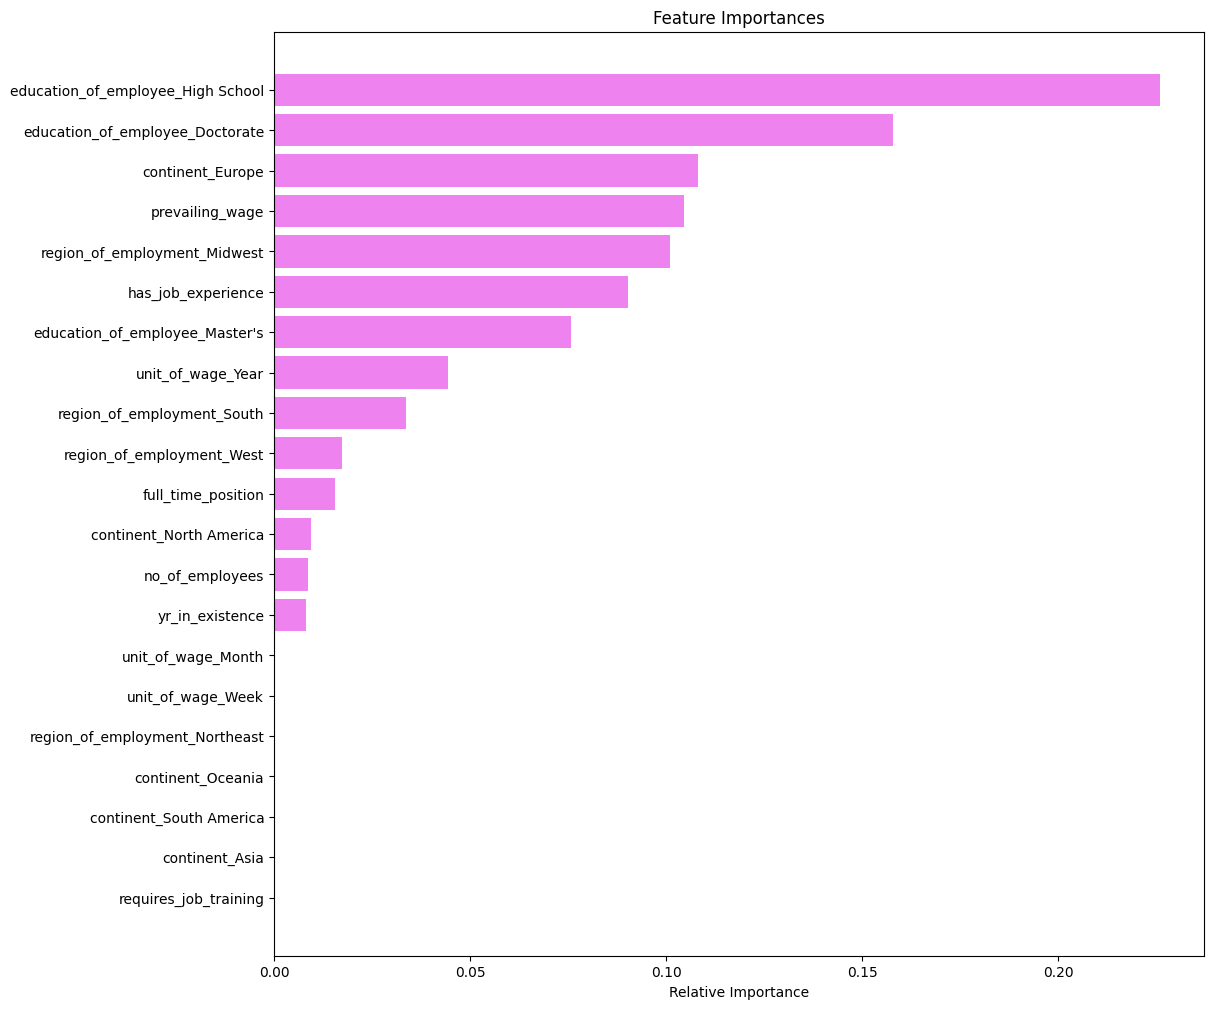

In [ ]:
#plot the feature importance for the ADA Boost regular on original data
plot_feature_importance_for_model(adaboost)


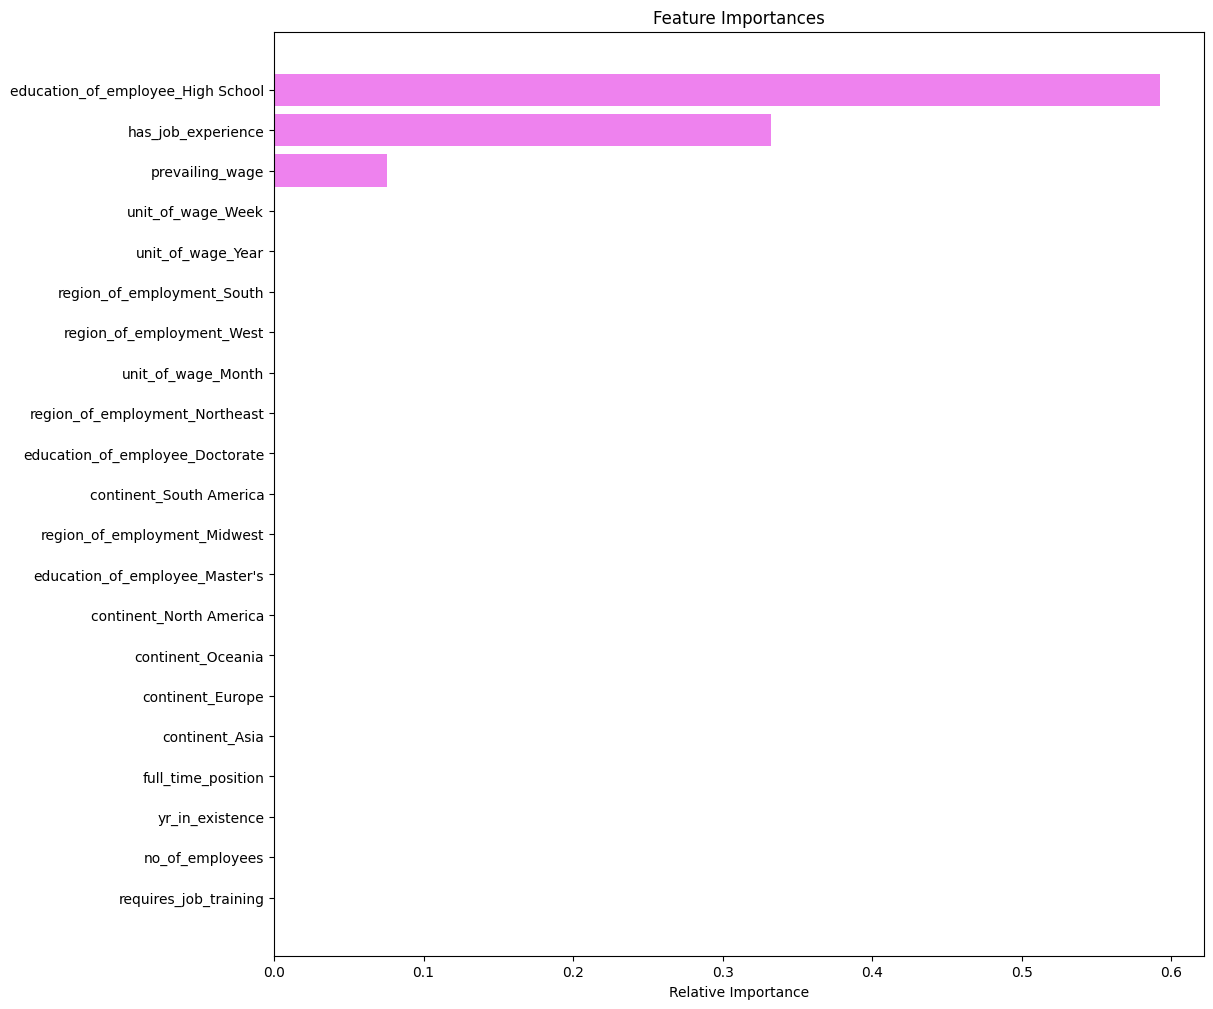

In [ ]:
#plot the feature importance for the ADA Boost tuned on oversampled data
plot_feature_importance_for_model(ada_tuned_best)

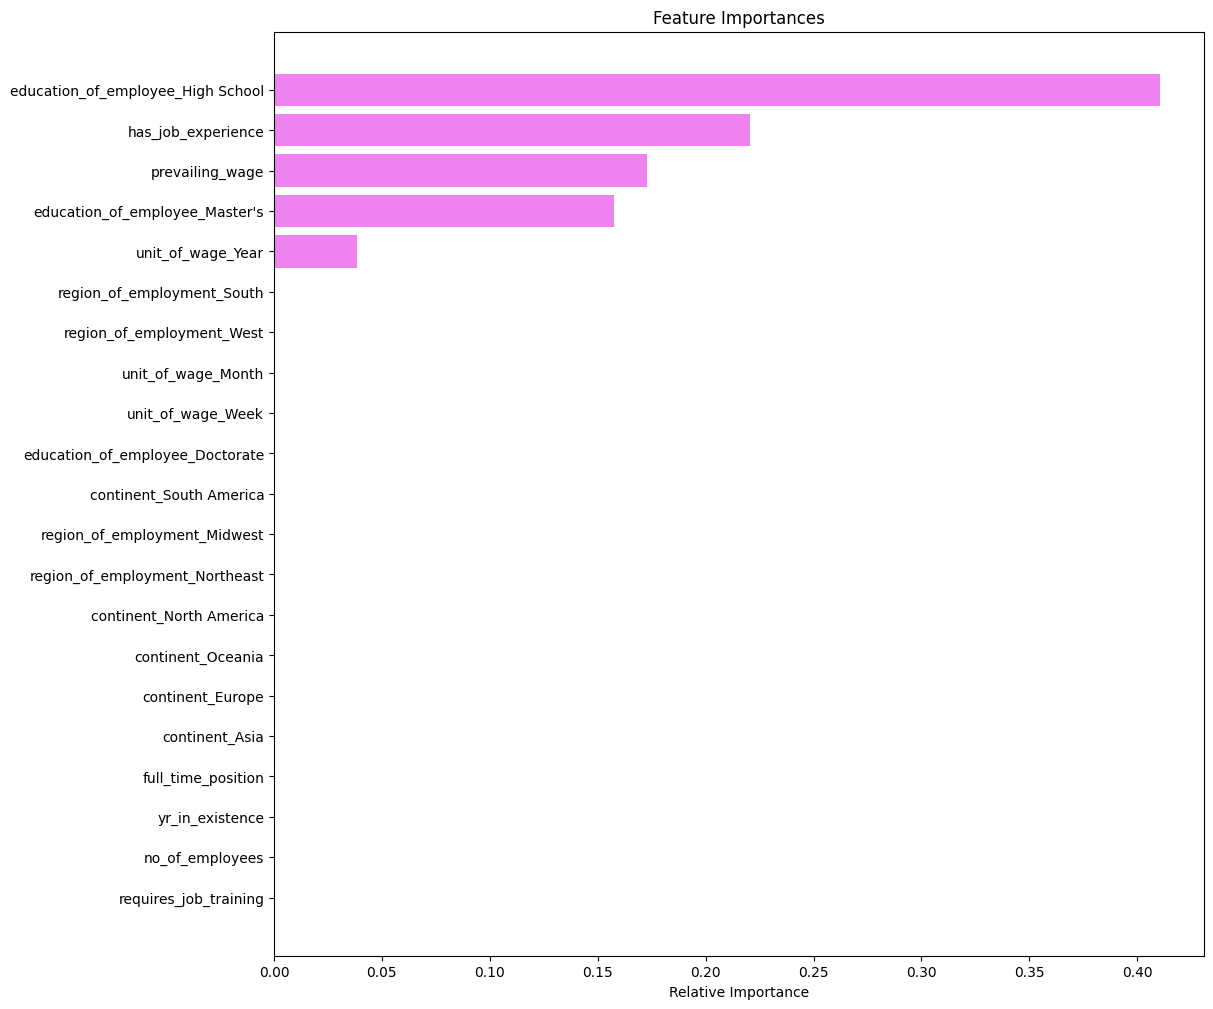

In [ ]:
#plot the feature importance for Ada boost tuned on original data
plot_feature_importance_for_model(ada_tuned_best_or)